In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, hamming_loss, jaccard_score, accuracy_score, confusion_matrix
import joblib
import re
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv("./CropDataset-Enhanced.csv")

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Dataset information
print("\nDataset Information:")
df.info()

# Statistical summary
print("\nStatistical Summary:")
display(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

First 5 rows of the dataset:


,Address,Status geocode,Formatted address,Latitude,Longitude,Type,Location Type,Country,Region,Crop,...,Phosphorous - High,Phosphorous - Medium,Phosphorous - Low,Potassium - High,Potassium - Medium,Potassium - Low,pH - Acidic,pH - Neutral,pH - Alkaline,
0,Ahilya nagar,Ok,"Ahilya Nagar, Maharashtra, India",19.094829,74.747979,"locality, political",APPROXIMATE,India,Maharashtra,"Sugarcane, Bajra (Pearl Millet), Wheat, Cotton...",...,74.02%,21.09%,4.89%,39.15%,42.81%,18.04%,0.11%,96.02%,3.87%,NaN
1,Akola,Ok,"Akola, Maharashtra, India",20.700216,77.008168,"locality, political",APPROXIMATE,India,Maharashtra,"Cotton, Soybean, Jowar (Sorghum), Wheat, Tur (...",...,68.52%,28.76%,2.72%,84.11%,14.74%,1.14%,0%,95.62%,4.38%,NaN
2,Amravati,Ok,"Amravati, Maharashtra, India",20.931982,77.752304,"locality, political",APPROXIMATE,India,Maharashtra,"Cotton, Soybean, Jowar (Sorghum), Wheat, Tur (...",...,9.76%,28.19%,62.05%,80.88%,6.25%,12.87%,13.44%,84.55%,2.01%,NaN
3,"Chhatrapati Sambhaji Nagar, Maharashtra",Ok,"Chhatrapati Sambhaji Nagar, Maharashtra, India",19.875754,75.339320,"locality, political",APPROXIMATE,India,Maharashtra,"Cotton, Bajra (Pearl Millet), Wheat, Sugarcane...",...,61.51%,30.92%,7.57%,73.23%,24.86%,1.91%,0%,90.48%,9.52%,NaN
4,"Beed, Maharashtra",Ok,"Beed, Maharashtra 431122, India",18.990088,75.753132,"locality, political",APPROXIMATE,India,Maharashtra,"Cotton, Bajra (Pearl Millet), Wheat, Sugarcane...",...,13.78%,75.24%,10.98%,52.74%,42.98%,4.28%,0.11%,90.24%,9.65%,NaN



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Address               730 non-null    object 
 1   Status geocode        730 non-null    object 
 2   Formatted address     730 non-null    object 
 3   Latitude              730 non-null    float64
 4   Longitude             730 non-null    float64
 5   Type                  730 non-null    object 
 6   Location Type         730 non-null    object 
 7   Country               730 non-null    object 
 8   Region                730 non-null    object 
 9   Crop                  730 non-null    object 
 10  Nitrogen - High       695 non-null    object 
 11  Nitrogen - Medium     695 non-null    object 
 12  Nitrogen - Low        695 non-null    object 
 13  Phosphorous - High    695 non-null    object 
 14  Phosphorous - Medium  695 non-null    object 
 15  P

,Latitude,Longitude,
count,730.000000,730.000000,0.0
mean,23.132890,81.557166,NaN
std,5.687356,6.582537,NaN
min,7.120539,69.383108,NaN
25%,20.114212,76.662962,NaN
50%,24.352397,79.631580,NaN
75%,26.831373,85.872046,NaN
max,34.553852,96.835100,NaN



Missing values in each column:
Address                   0
Status geocode            0
Formatted address         0
Latitude                  0
Longitude                 0
Type                      0
Location Type             0
Country                   0
Region                    0
Crop                      0
Nitrogen - High          35
Nitrogen - Medium        35
Nitrogen - Low           35
Phosphorous - High       35
Phosphorous - Medium     35
Phosphorous - Low        35
Potassium - High         35
Potassium - Medium       35
Potassium - Low          35
pH - Acidic              35
pH - Neutral             35
pH - Alkaline            35
                        730
dtype: int64


Number of unique crops: 584

Sample of crops available in the dataset:
['Paddy, Maize, Vegetables' 'Wheat, Rice, Sugarcane, Mustard'
 'Paddy, Millets, Cashew' 'rice, coconut, rubber' 'Paddy, Gram, Lentil'
 'Rice, Maize, Pulses, Oilseeds' 'Maize, Millets, Potato, Ginger'
 'Maize, Rajma, Wheat, Apple' 'Wheat, Maize, Mustard, Pulses'
 'Wheat, Mustard, Bajra, Pulses']


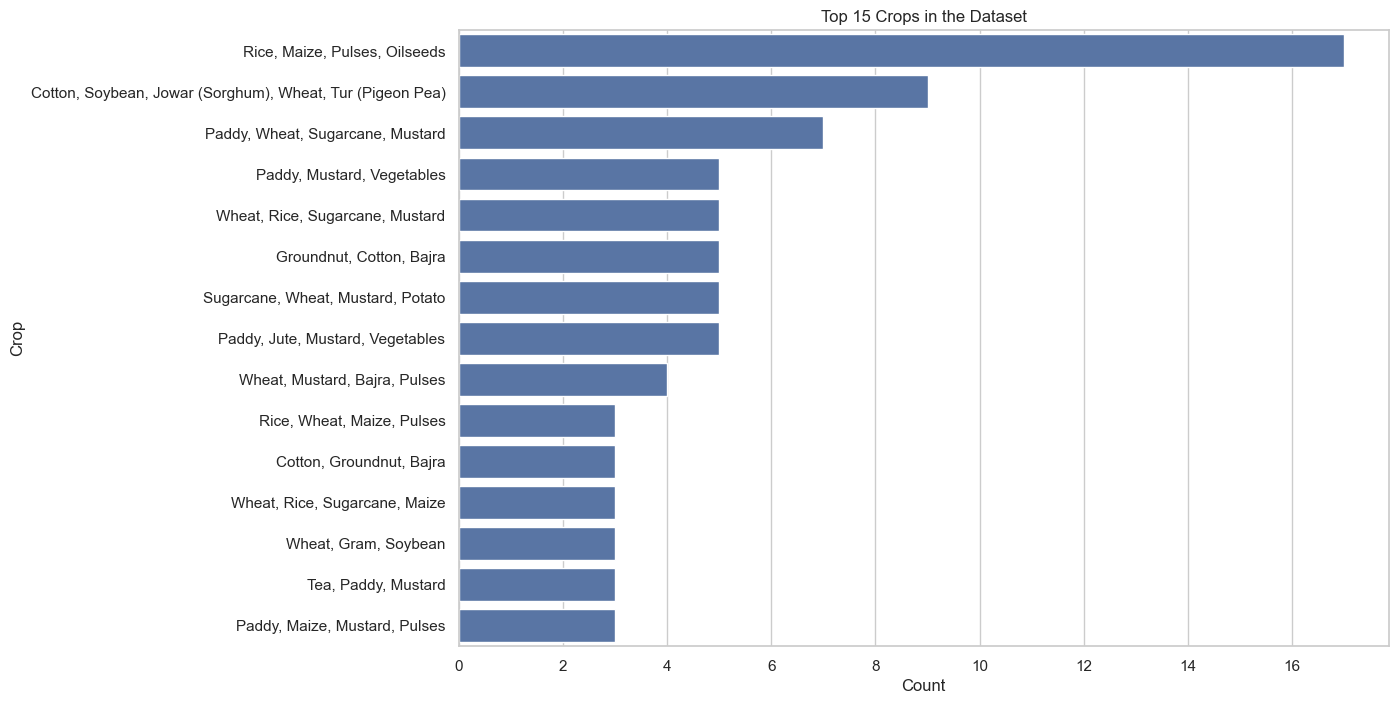

Data types of nutrient columns:
Nitrogen - High         object
Nitrogen - Medium       object
Nitrogen - Low          object
Phosphorous - High      object
Phosphorous - Medium    object
Phosphorous - Low       object
Potassium - High        object
Potassium - Medium      object
Potassium - Low         object
pH - Acidic             object
pH - Neutral            object
pH - Alkaline           object
dtype: object


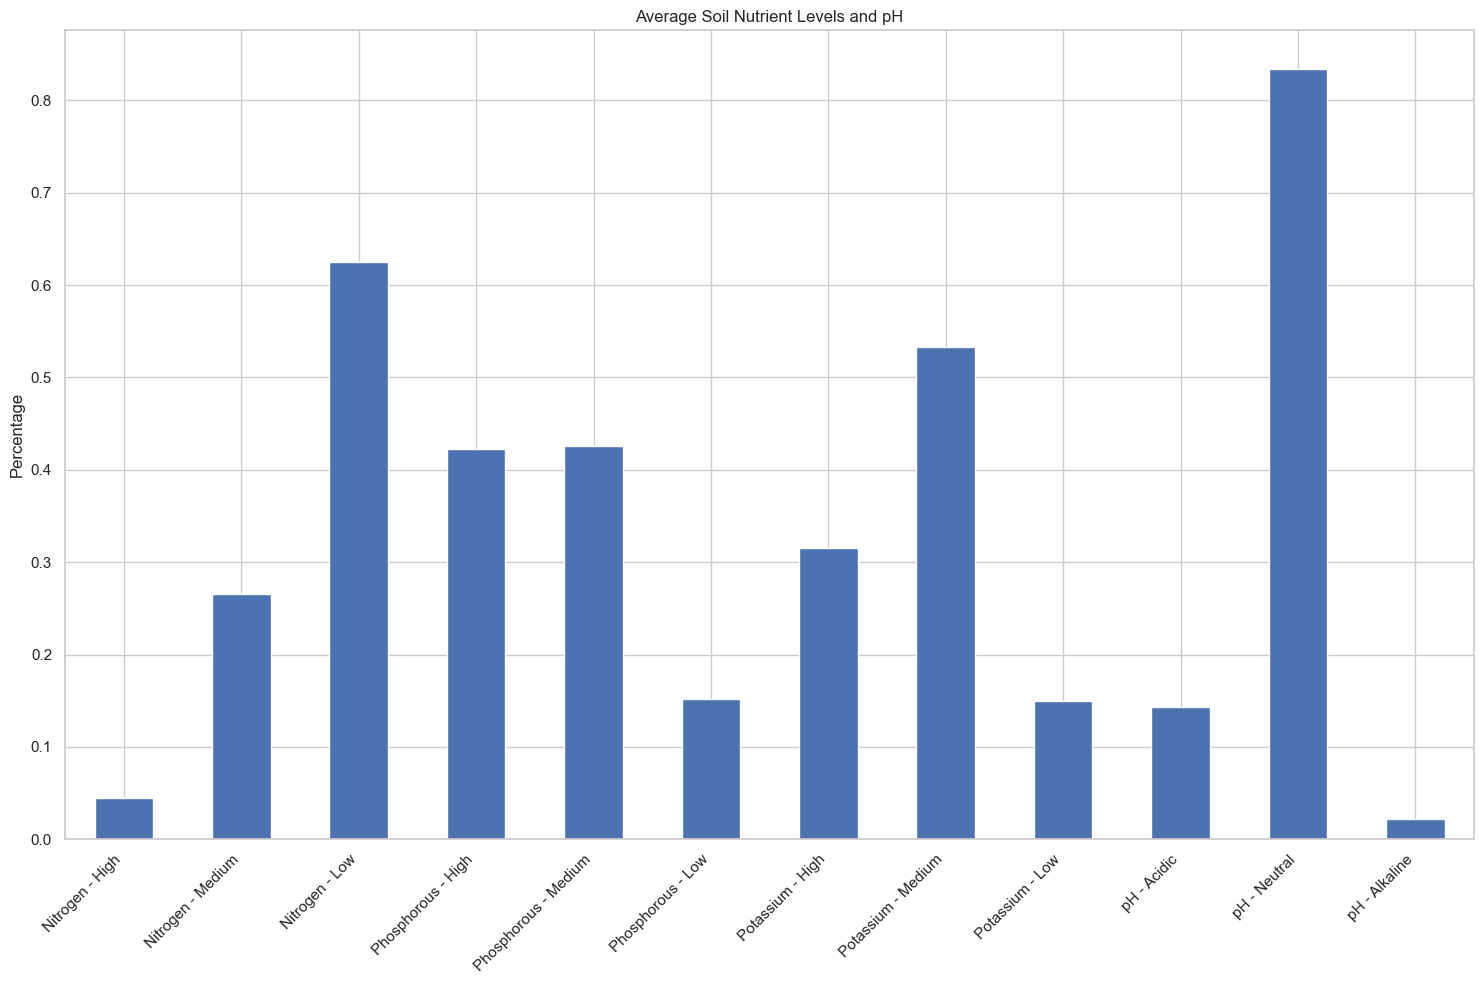

In [3]:
# Check unique values in the Crop column
print("Number of unique crops:", df['Crop'].nunique())
print("\nSample of crops available in the dataset:")
print(df['Crop'].sample(10).values)

# Create a visualization of regions and their top crops
plt.figure(figsize=(12, 8))
crop_counts = df['Crop'].value_counts().head(15)
sns.barplot(x=crop_counts.values, y=crop_counts.index)
plt.title('Top 15 Crops in the Dataset')
plt.xlabel('Count')
plt.ylabel('Crop')
plt.show()

# Distribution of soil nutrient levels across regions
nutrient_columns = [col for col in df.columns if any(x in col for x in ['Nitrogen', 'Phosphorous', 'Potassium', 'pH'])]

# First, check the data types of your nutrient columns
print("Data types of nutrient columns:")
print(df[nutrient_columns].dtypes)

# Convert percentage strings to numerical values before calculating mean
for col in nutrient_columns:
    # Strip the '%' symbol and convert to float
    df[col] = df[col].astype(str).str.replace('%', '').astype(float) / 100

# Now calculate the mean and plot
plt.figure(figsize=(15, 10))
df[nutrient_columns].mean().plot(kind='bar')
plt.title('Average Soil Nutrient Levels and pH')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
# Clean the dataset
# Drop unnecessary columns
df_clean = df.drop(columns=["Status geocode", "Formatted address", "Type", "Location Type", 
                            "Country", "Address", "Unnamed: 22"], errors='ignore')

# Convert percentage strings to float values
percentage_cols = [col for col in df_clean.columns if any(x in col for x in ['Nitrogen', 'Phosphorous', 'Potassium', 'pH'])]

for col in percentage_cols:
    # Convert percentage strings to float values
    df_clean[col] = df_clean[col].astype(str).str.replace('%', '').astype(float) / 100

# Clean and process the Crop column for multi-label classification
df_clean['crops_list'] = df_clean['Crop'].fillna('').apply(
    lambda x: [crop.strip() for crop in re.split(r'[,;]', x) if crop.strip()]
)

# Display the cleaned dataset
print("Cleaned dataset sample:")
display(df_clean[['Region', 'Latitude', 'Longitude', 'crops_list'] + percentage_cols].head())

print("\nFeatures shape after cleaning:", df_clean.shape)

Cleaned dataset sample:


,Region,Latitude,Longitude,crops_list,Nitrogen - High,Nitrogen - Medium,Nitrogen - Low,Phosphorous - High,Phosphorous - Medium,Phosphorous - Low,Potassium - High,Potassium - Medium,Potassium - Low,pH - Acidic,pH - Neutral,pH - Alkaline
0,Maharashtra,19.094829,74.747979,"[Sugarcane, Bajra (Pearl Millet), Wheat, Cotto...",0.000003,0.000355,0.009642,0.007402,0.002109,0.000489,0.003915,0.004281,0.001804,0.000011,0.009602,0.000387
1,Maharashtra,20.700216,77.008168,"[Cotton, Soybean, Jowar (Sorghum), Wheat, Tur ...",0.000005,0.000028,0.009967,0.006852,0.002876,0.000272,0.008411,0.001474,0.000114,0.000000,0.009562,0.000438
2,Maharashtra,20.931982,77.752304,"[Cotton, Soybean, Jowar (Sorghum), Wheat, Tur ...",0.000010,0.000087,0.009903,0.000976,0.002819,0.006205,0.008088,0.000625,0.001287,0.001344,0.008455,0.000201
3,Maharashtra,19.875754,75.339320,"[Cotton, Bajra (Pearl Millet), Wheat, Sugarcan...",0.000003,0.000191,0.009807,0.006151,0.003092,0.000757,0.007323,0.002486,0.000191,0.000000,0.009048,0.000952
4,Maharashtra,18.990088,75.753132,"[Cotton, Bajra (Pearl Millet), Wheat, Sugarcan...",0.000219,0.003657,0.006125,0.001378,0.007524,0.001098,0.005274,0.004298,0.000428,0.000011,0.009024,0.000965



Features shape after cleaning: (730, 18)


Sample of extracted dominant soil characteristic levels:


,Region,N_level,P_level,K_level,pH_level,crops_list
0,Maharashtra,Low,High,Medium,Neutral,"[Sugarcane, Bajra (Pearl Millet), Wheat, Cotto..."
1,Maharashtra,Low,High,High,Neutral,"[Cotton, Soybean, Jowar (Sorghum), Wheat, Tur ..."
2,Maharashtra,Low,Low,High,Neutral,"[Cotton, Soybean, Jowar (Sorghum), Wheat, Tur ..."
3,Maharashtra,Low,High,High,Neutral,"[Cotton, Bajra (Pearl Millet), Wheat, Sugarcan..."
4,Maharashtra,Low,Medium,High,Neutral,"[Cotton, Bajra (Pearl Millet), Wheat, Sugarcan..."
5,Maharashtra,Low,Low,High,Neutral,"[Rice, Wheat, Linseed, Tur (Pigeon Pea), Mustard]"
6,Maharashtra,Low,Medium,High,Neutral,"[Cotton, Soybean, Jowar (Sorghum), Wheat, Tur ..."
7,Maharashtra,Low,Medium,Medium,Neutral,"[Rice, Cotton, Soybean, Jowar (Sorghum), Tur (..."
8,Maharashtra,Low,Medium,High,Neutral,"[Cotton, Bajra (Pearl Millet), Wheat, Groundnu..."
9,Maharashtra,Low,Medium,Medium,Neutral,"[Rice, Linseed, Mustard, Tur (Pigeon Pea)]"



Distribution of dominant soil levels:

N_level distribution:
N_level
Low       457
Medium    171
High       67
Name: count, dtype: int64

P_level distribution:
P_level
High      325
Medium    308
Low        62
Name: count, dtype: int64

K_level distribution:
K_level
Medium    422
High      207
Low        66
Name: count, dtype: int64

pH_level distribution:
pH_level
Neutral     605
Acidic       88
Alkaline      2
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

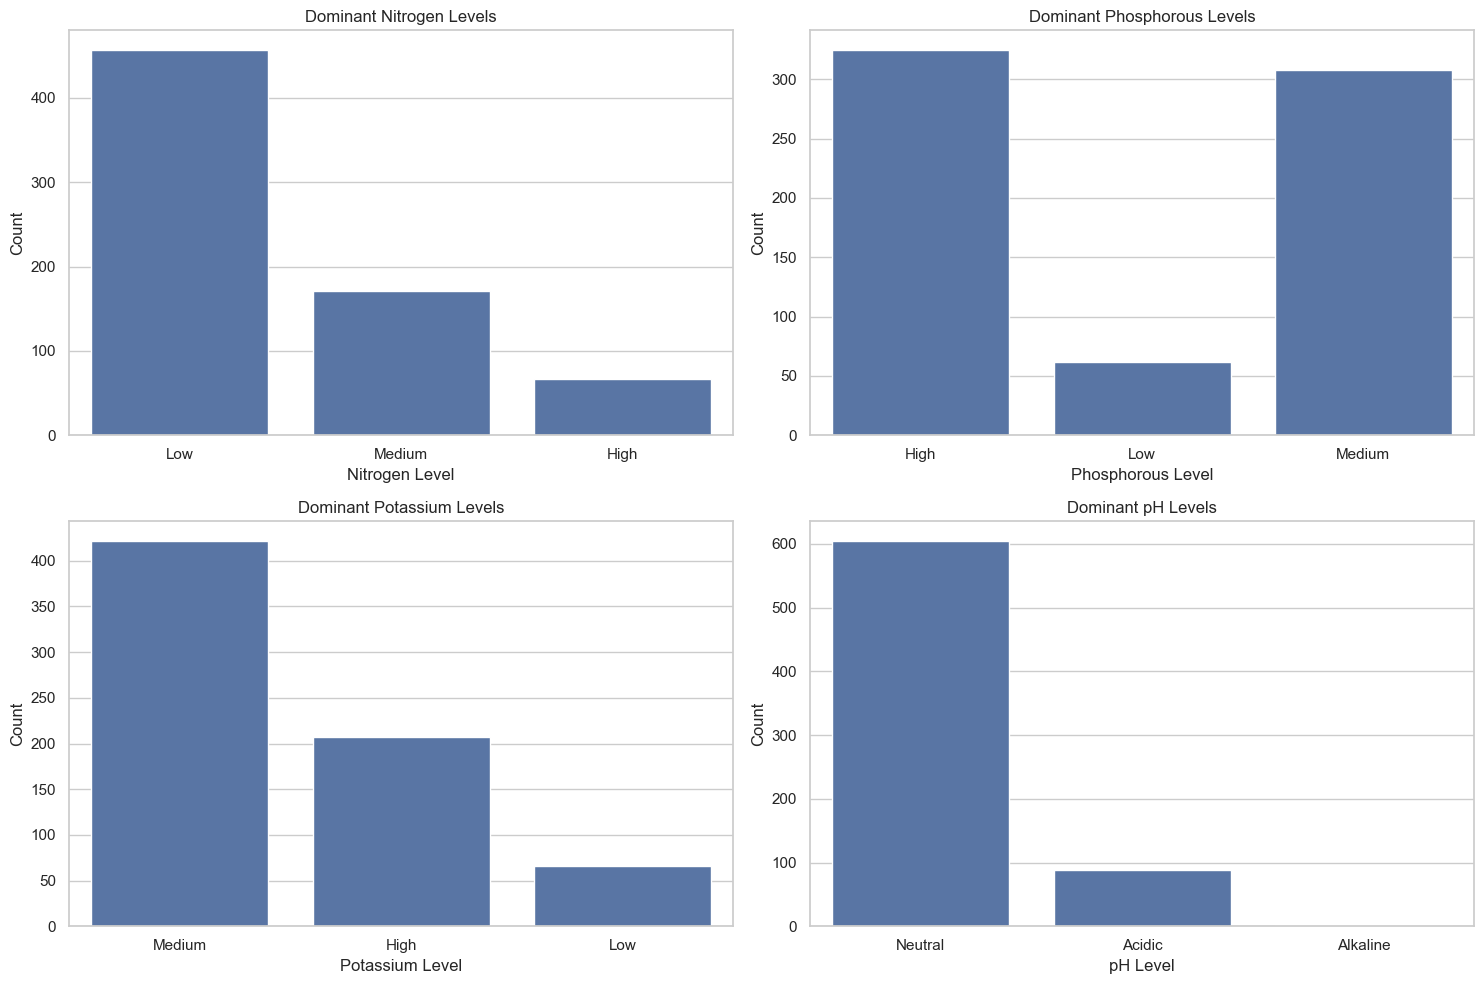

In [5]:
# Extract dominant level for each soil characteristic
# For Nitrogen
df_clean['N_level'] = df_clean[['Nitrogen - High', 'Nitrogen - Medium', 'Nitrogen - Low']].idxmax(axis=1).str.split(' - ').str[1]

# For Phosphorous
df_clean['P_level'] = df_clean[['Phosphorous - High', 'Phosphorous - Medium', 'Phosphorous - Low']].idxmax(axis=1).str.split(' - ').str[1]

# For Potassium
df_clean['K_level'] = df_clean[['Potassium - High', 'Potassium - Medium', 'Potassium - Low']].idxmax(axis=1).str.split(' - ').str[1]

# For pH
df_clean['pH_level'] = df_clean[['pH - Acidic', 'pH - Neutral', 'pH - Alkaline']].idxmax(axis=1).str.split(' - ').str[1]

# Display the extracted dominant levels
print("Sample of extracted dominant soil characteristic levels:")
display(df_clean[['Region', 'N_level', 'P_level', 'K_level', 'pH_level', 'crops_list']].head(10))

# Count distribution of each level
print("\nDistribution of dominant soil levels:")
for col in ['N_level', 'P_level', 'K_level', 'pH_level']:
    print(f"\n{col} distribution:")
    print(df_clean[col].value_counts())
    
# Visualize the distribution of dominant soil characteristics
plt.figure(figsize=(15, 10))
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='N_level', data=df_clean, ax=axs[0, 0])
axs[0, 0].set_title('Dominant Nitrogen Levels')
axs[0, 0].set_xlabel('Nitrogen Level')
axs[0, 0].set_ylabel('Count')

sns.countplot(x='P_level', data=df_clean, ax=axs[0, 1])
axs[0, 1].set_title('Dominant Phosphorous Levels')
axs[0, 1].set_xlabel('Phosphorous Level')
axs[0, 1].set_ylabel('Count')

sns.countplot(x='K_level', data=df_clean, ax=axs[1, 0])
axs[1, 0].set_title('Dominant Potassium Levels')
axs[1, 0].set_xlabel('Potassium Level')
axs[1, 0].set_ylabel('Count')

sns.countplot(x='pH_level', data=df_clean, ax=axs[1, 1])
axs[1, 1].set_title('Dominant pH Levels')
axs[1, 1].set_xlabel('pH Level')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [6]:
# Create a new feature set using the categorical soil levels
# One-hot encode the categorical features
cat_features = pd.get_dummies(df_clean[['N_level', 'P_level', 'K_level', 'pH_level']], prefix=['N', 'P', 'K', 'pH'])

# Add location data
X_categorical = pd.concat([df_clean[['Latitude', 'Longitude']], cat_features], axis=1)

# Display the categorical feature set
print("Categorical feature set shape:", X_categorical.shape)
print("Sample of categorical features:")
display(X_categorical.head())

# Scale the numerical features (latitude and longitude)
num_cols = ['Latitude', 'Longitude']
scaler_cat = StandardScaler()
X_categorical[num_cols] = scaler_cat.fit_transform(X_categorical[num_cols])

# Define the target variable (y) using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df_clean['crops_list'])

# Train a first-stage classifier using the categorical features
X_cat_train, X_cat_test, y_train_cat, y_test_cat = train_test_split(
    X_categorical, y, test_size=0.2, random_state=42
)

print("Training categorical feature model...")
cat_base_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

cat_model = MultiOutputClassifier(cat_base_model)
cat_model.fit(X_cat_train, y_train_cat)

# Evaluate the categorical feature model
y_cat_pred = cat_model.predict(X_cat_test)
print("\nCategorical Feature Model Evaluation:")
print(f"Hamming Loss: {hamming_loss(y_test_cat, y_cat_pred):.4f}")
print(f"Jaccard Score: {jaccard_score(y_test_cat, y_cat_pred, average='samples'):.4f}")

Categorical feature set shape: (730, 14)
Sample of categorical features:


,Latitude,Longitude,N_High,N_Low,N_Medium,P_High,P_Low,P_Medium,K_High,K_Low,K_Medium,pH_Acidic,pH_Alkaline,pH_Neutral
0,19.094829,74.747979,False,True,False,True,False,False,False,False,True,False,False,True
1,20.700216,77.008168,False,True,False,True,False,False,True,False,False,False,False,True
2,20.931982,77.752304,False,True,False,False,True,False,True,False,False,False,False,True
3,19.875754,75.339320,False,True,False,True,False,False,True,False,False,False,False,True
4,18.990088,75.753132,False,True,False,False,False,True,True,False,False,False,False,True


Training categorical feature model...

Categorical Feature Model Evaluation:
Hamming Loss: 0.0157
Jaccard Score: 0.3565



Creating Soil Predictor Model based on location
N_level encoding mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2), nan: np.int64(3)}
P_level encoding mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2), nan: np.int64(3)}
K_level encoding mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2), nan: np.int64(3)}
pH_level encoding mapping: {'Acidic': np.int64(0), 'Alkaline': np.int64(1), 'Neutral': np.int64(2), nan: np.int64(3)}

Training N_level prediction model...
N_level prediction accuracy: 0.7603

Classification report:
              precision    recall  f1-score   support

        High       0.80      0.57      0.67        14
         Low       0.79      0.89      0.83        88
      Medium       0.70      0.53      0.60        40
         nan       0.57      1.00      0.73         4

    accuracy                           0.76       146
   macro avg       0.71      0.75      0.71       146
weighted avg       0.76     

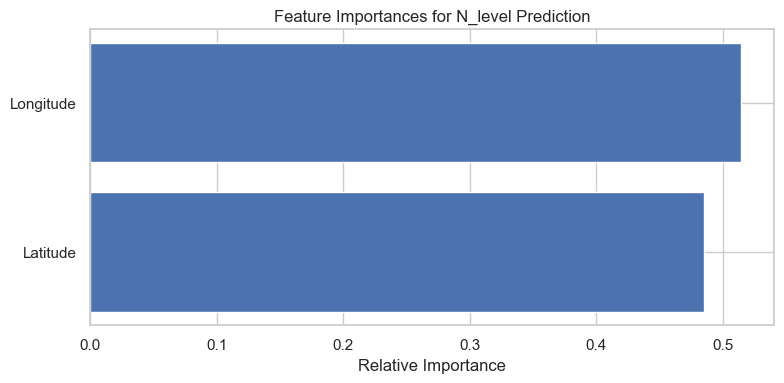


Training P_level prediction model...
P_level prediction accuracy: 0.6301

Classification report:
              precision    recall  f1-score   support

        High       0.64      0.70      0.67        64
         Low       0.29      0.15      0.20        13
      Medium       0.65      0.63      0.64        65
         nan       0.67      1.00      0.80         4

    accuracy                           0.63       146
   macro avg       0.56      0.62      0.58       146
weighted avg       0.62      0.63      0.62       146



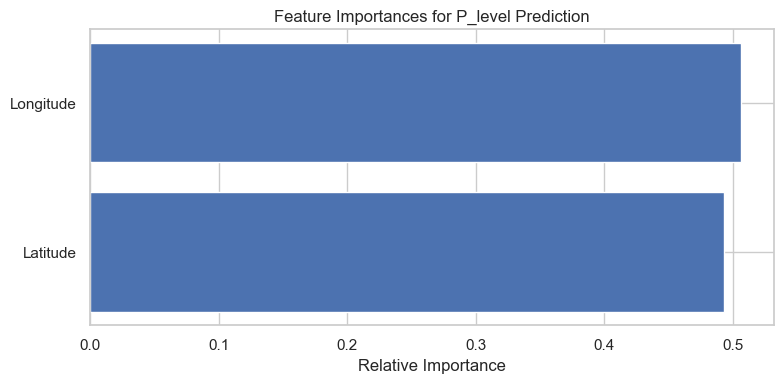


Training K_level prediction model...
K_level prediction accuracy: 0.6644

Classification report:
              precision    recall  f1-score   support

        High       0.53      0.57      0.55        37
         Low       0.67      0.32      0.43        19
      Medium       0.73      0.77      0.75        86
         nan       0.57      1.00      0.73         4

    accuracy                           0.66       146
   macro avg       0.62      0.66      0.61       146
weighted avg       0.67      0.66      0.66       146



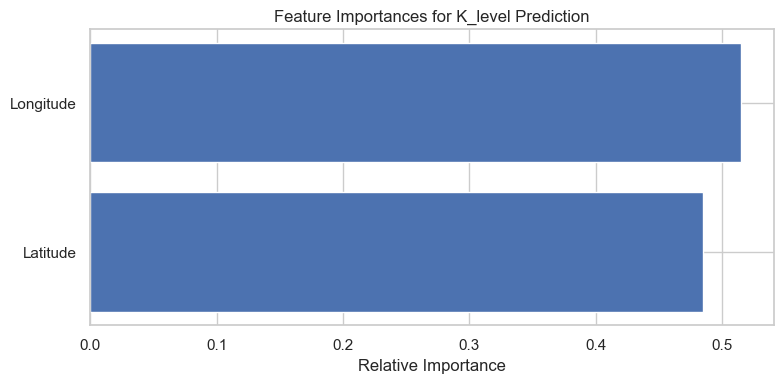


Training pH_level prediction model...
pH_level prediction accuracy: 0.8630

Classification report:
              precision    recall  f1-score   support

      Acidic       0.65      0.50      0.56        22
    Alkaline       0.00      0.00      0.00         1
     Neutral       0.90      0.93      0.92       119
         nan       0.67      1.00      0.80         4

    accuracy                           0.86       146
   macro avg       0.55      0.61      0.57       146
weighted avg       0.85      0.86      0.85       146



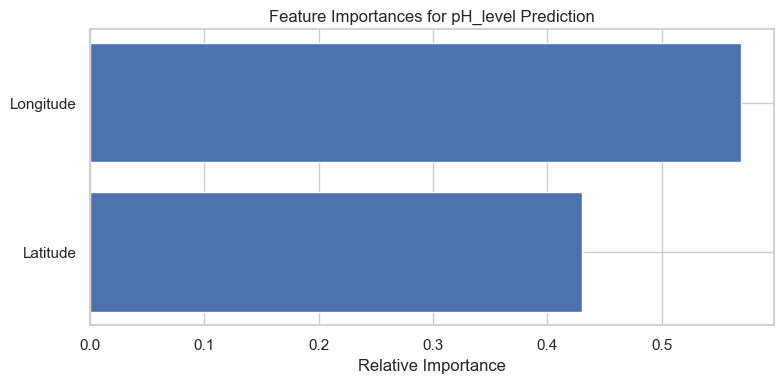

In [7]:

print("\n" + "="*80)
print("Creating Soil Predictor Model based on location")
print("="*80)

# Prepare data for soil predictor model
# Features: location (latitude, longitude)
X_soil = df_clean[['Latitude', 'Longitude']]

# Targets: soil characteristic levels 
# We'll use LabelEncoder to convert categorical levels to numbers
soil_levels = ['N_level', 'P_level', 'K_level', 'pH_level']
soil_encoders = {}
y_soil_encoded = pd.DataFrame()

# Encode each soil characteristic
for level in soil_levels:
    encoder = LabelEncoder()
    y_soil_encoded[level] = encoder.fit_transform(df_clean[level])
    soil_encoders[level] = encoder
    print(f"{level} encoding mapping:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

# Scale features
soil_scaler = StandardScaler()
X_soil_scaled = soil_scaler.fit_transform(X_soil)

# Split data for soil prediction model
X_soil_train, X_soil_test, y_soil_train, y_soil_test = train_test_split(
    X_soil_scaled, y_soil_encoded, test_size=0.2, random_state=42
)

# Train soil prediction models (one for each characteristic)
soil_models = {}
soil_accuracy = {}

for level in soil_levels:
    print(f"\nTraining {level} prediction model...")
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_soil_train, y_soil_train[level])
    soil_models[level] = model
    
    # Evaluate model
    y_pred = model.predict(X_soil_test)
    accuracy = accuracy_score(y_soil_test[level], y_pred)
    soil_accuracy[level] = accuracy
    
    print(f"{level} prediction accuracy: {accuracy:.4f}")
    
    # Display classification report
    print("\nClassification report:")
    target_names = [str(name) for name in soil_encoders[level].classes_]
    print(classification_report(y_soil_test[level], y_pred, target_names=target_names))
    
    # Plot feature importances
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(8, 4))
        importances = model.feature_importances_
        indices = np.argsort(importances)
        features = ['Latitude', 'Longitude']
        plt.title(f'Feature Importances for {level} Prediction')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [features[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.tight_layout()
        plt.show()


In [8]:

# Save soil prediction models and components
joblib.dump(soil_models, 'soil_prediction_models.pkl')
joblib.dump(soil_encoders, 'soil_level_encoders.pkl')
joblib.dump(soil_scaler, 'soil_feature_scaler.pkl')

# Create a function to predict soil characteristics from location
def predict_soil_characteristics(latitude, longitude):
    """
    Predict soil characteristics (N, P, K, pH levels) based on location
    
    Parameters:
    -----------
    latitude : float
        Latitude coordinate
    longitude : float
        Longitude coordinate
        
    Returns:
    --------
    dict
        Dictionary with predicted soil characteristics
    """
    # Prepare input data
    input_location = np.array([[latitude, longitude]])
    
    # Scale the input
    input_scaled = soil_scaler.transform(input_location)
    
    # Make predictions for each soil characteristic
    predictions = {}
    
    for level in soil_levels:
        # Predict encoded level
        level_encoded = soil_models[level].predict(input_scaled)[0]
        
        # Decode to get the actual level name
        level_name = soil_encoders[level].inverse_transform([level_encoded])[0]
        
        # Store in predictions dictionary
        predictions[level] = level_name
    
    return predictions




Soil characteristic predictions for sample locations:

Location (28.6139, 77.209):
- N_level: nan
- P_level: nan
- K_level: nan
- pH_level: nan

Location (19.076, 72.8777):
- N_level: nan
- P_level: nan
- K_level: nan
- pH_level: nan

Location (22.5726, 88.3639):
- N_level: Medium
- P_level: High
- K_level: High
- pH_level: Neutral


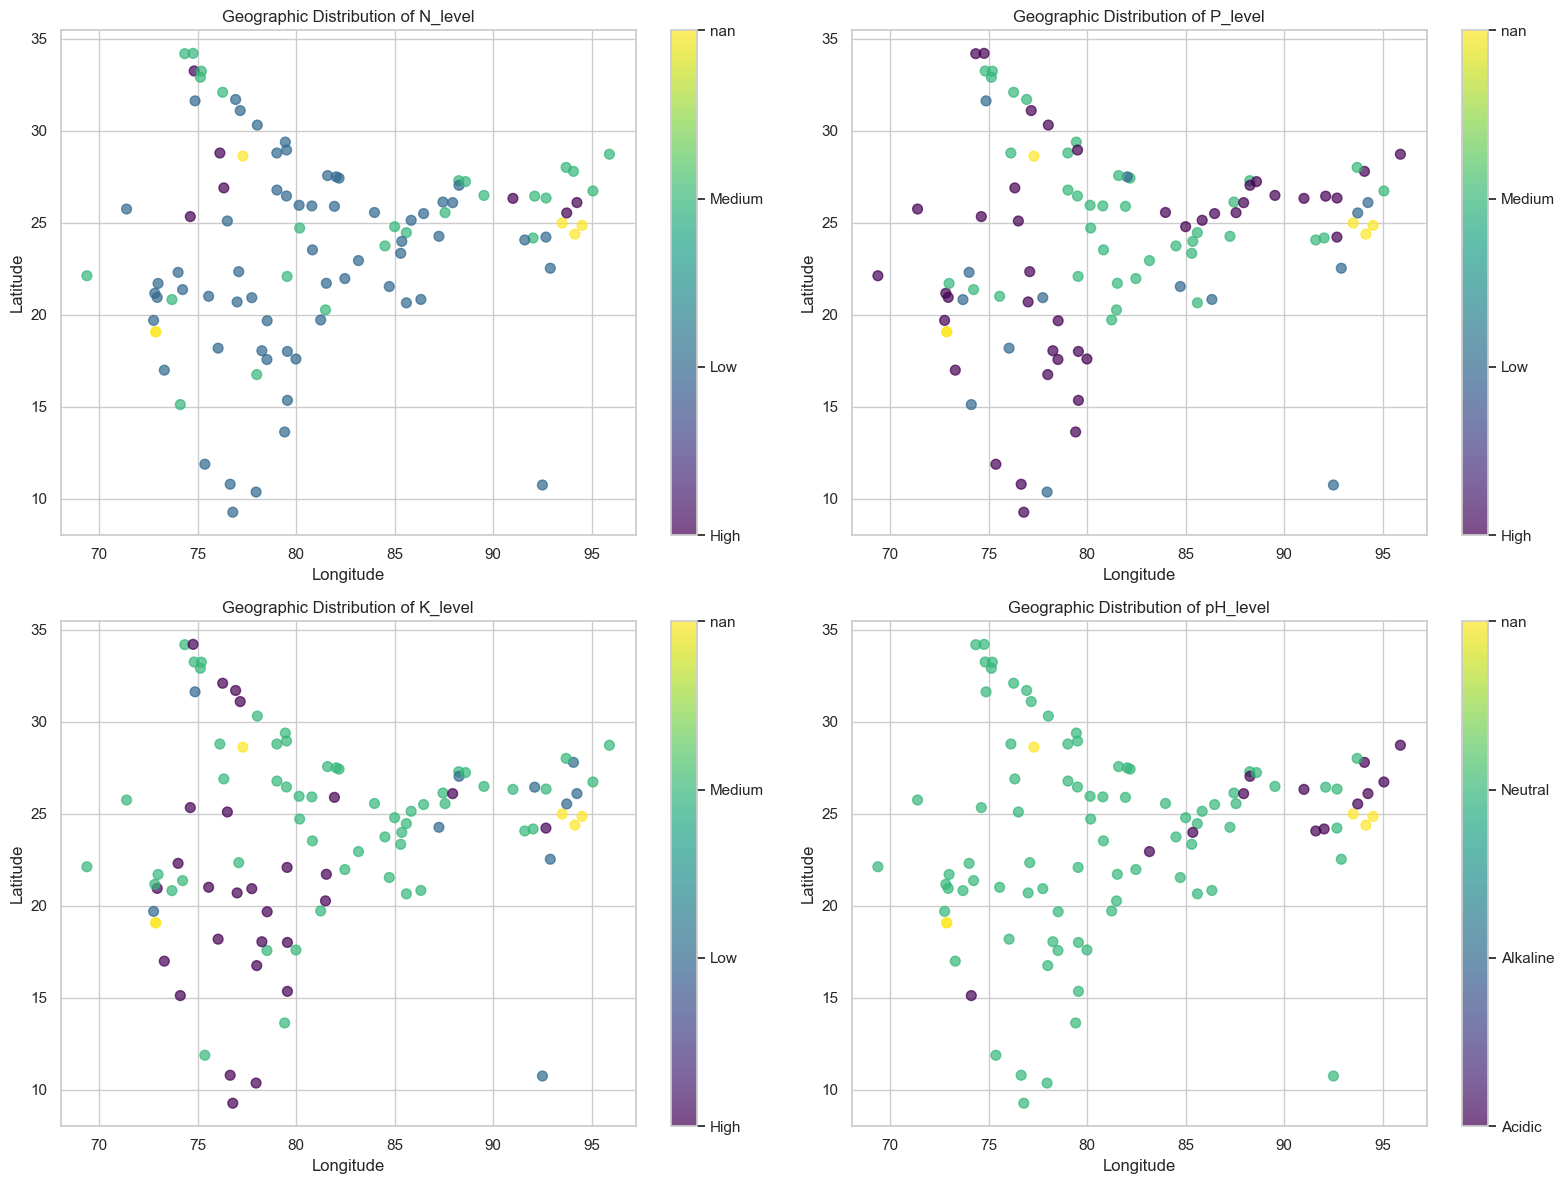


Soil prediction model training complete!
You can now use the 'predict_soil_characteristics' function to predict soil characteristics for any location.


In [9]:

# Test the soil prediction function with sample locations
test_locations = [
    (28.6139, 77.2090),  # New Delhi
    (19.0760, 72.8777),  # Mumbai
    (22.5726, 88.3639)   # Kolkata
]

print("\nSoil characteristic predictions for sample locations:")
for lat, lon in test_locations:
    predictions = predict_soil_characteristics(lat, lon)
    print(f"\nLocation ({lat}, {lon}):")
    for level, value in predictions.items():
        print(f"- {level}: {value}")

# Create a visualization showing the relationship between location and soil characteristics
# Sample 100 random locations from the dataset for visualization
sample_size = min(100, len(df_clean))
sample_indices = np.random.choice(len(df_clean), sample_size, replace=False)
sample_data = df_clean.iloc[sample_indices]

# Create scatter plots colored by each soil characteristic
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

for i, level in enumerate(soil_levels):
    scatter = axs[i].scatter(
        sample_data['Longitude'], 
        sample_data['Latitude'],
        c=soil_encoders[level].transform(sample_data[level]),
        cmap='viridis',
        alpha=0.7,
        s=50
    )
    
    axs[i].set_title(f'Geographic Distribution of {level}')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    
    # Add colorbar with level labels
    cbar = plt.colorbar(scatter, ax=axs[i])
    cbar.set_ticks(range(len(soil_encoders[level].classes_)))
    cbar.set_ticklabels(soil_encoders[level].classes_)

plt.tight_layout()
plt.show()

print("\nSoil prediction model training complete!")
print("You can now use the 'predict_soil_characteristics' function to predict soil characteristics for any location.")


In [10]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()
weather_api_key = os.getenv('WEATHER_API_KEY')


In [11]:
import requests
import json
from datetime import datetime

async def get_weather_data(latitude, longitude):
    """
    Fetch weather data from a weather API for a specific location
    
    Parameters:
    -----------
    latitude : float
        Latitude coordinate
    longitude : float
        Longitude coordinate
        
    Returns:
    --------
    dict
        Weather data including temperature, rainfall, humidity, etc.
    """
    # Fix the variable names to use parameters instead of undefined variables
    url = f"https://api.weatherapi.com/v1/current.json?key={weather_api_key}&q={latitude},{longitude}"
    try :
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            
            # Extract relevant weather information
            weather_data = {
                "lat": latitude,
                "lon": longitude,
                "temperature": data["current"]["temp_c"],
                "humidity": data["current"]["humidity"],
                "description": data["current"]["condition"]["text"],
                "wind_speed": data["current"]["wind_kph"] / 3.6,  # Convert to m/s
                "rainfall": data["current"]["precip_mm"],
                "timestamp": datetime.now().isoformat()
            }
            return weather_data
        else:
            raise Exception(f"Error fetching weather data: {response.status_code}")
    except Exception as e:
        print(f"Error: {e}")
        return None

In [12]:
#LLM part 
from openai import OpenAI

token = os.getenv("GITHUB_TOKEN")  # Get token from .env
endpoint = "https://models.inference.ai.azure.com"
model_name = "gpt-4o-mini"

client = OpenAI(
    base_url=endpoint,
    api_key=token,
)

In [13]:
async def call_llm_api(prompt):
    """
    Call LLM API with the given prompt
    
    Parameters:
    -----------
    prompt : str
        The prompt to send to the LLM
        
    Returns:
    --------
    str
        The LLM's response
    """
    try:
        response = client.chat.completions.create(
            model=model_name,
            messages=[
                {"role": "system", "content": "You are an agricultural expert who specializes in soil science."},
                {"role": "user", "content": prompt}
            ],
            temperature=0,
            max_tokens=800
        )
        return response.choices[0].message.content
    except Exception as e:
        print(f"Error calling LLM API: {str(e)}")
        # Return a fallback response in valid JSON format
        return json.dumps({
            "N_level": "Medium", 
            "P_level": "Medium", 
            "K_level": "Low", 
            "pH_level": "Neutral",
            "explanation": "Using default values due to API error."
        })

In [14]:
async def validate_soil_with_llm(soil_predictions, weather_data, location_name=None):
    """
    Send predicted soil characteristics and weather data to LLM for validation/adjustment
    
    Parameters:
    -----------
    soil_predictions : dict
        Dictionary with predicted soil characteristics from the ML model
    weather_data : dict
        Weather data for the location
    location_name : str, optional
        Name of the location if available
        
    Returns:
    --------
    dict
        Validated/adjusted soil characteristics
    """
    # Make a copy of the predictions to avoid modifying the original
    soil_predictions = soil_predictions.copy()
    
    # Handle NaN values and set defaults
    for key in ['N_level', 'P_level', 'K_level', 'pH_level']:
        if key not in soil_predictions or pd.isna(soil_predictions[key]):
            if key == 'N_level':
                soil_predictions[key] = 'Medium'
            elif key == 'P_level':
                soil_predictions[key] = 'Medium'  
            elif key == 'K_level':
                soil_predictions[key] = 'Low'
            elif key == 'pH_level':
                soil_predictions[key] = 'Neutral'
                
    # Add default numeric values if they don't exist
    # These are approximate values based on the categorical levels
    if 'N' not in soil_predictions:
        # Add estimated values based on levels
        if soil_predictions['N_level'] == 'High':
            soil_predictions['N'] = 120
        elif soil_predictions['N_level'] == 'Medium':
            soil_predictions['N'] = 80
        else:  # Low
            soil_predictions['N'] = 40
            
    if 'P' not in soil_predictions:
        if soil_predictions['P_level'] == 'High':
            soil_predictions['P'] = 80
        elif soil_predictions['P_level'] == 'Medium':
            soil_predictions['P'] = 40
        else:  # Low
            soil_predictions['P'] = 20
            
    if 'K' not in soil_predictions:
        if soil_predictions['K_level'] == 'High':
            soil_predictions['K'] = 240
        elif soil_predictions['K_level'] == 'Medium':
            soil_predictions['K'] = 170
        else:  # Low
            soil_predictions['K'] = 100
            
    if 'ph' not in soil_predictions:
        if soil_predictions['pH_level'] == 'Acidic':
            soil_predictions['ph'] = 5.5
        elif soil_predictions['pH_level'] == 'Neutral':
            soil_predictions['ph'] = 7.0
        else:  # Alkaline
            soil_predictions['ph'] = 8.5
    
    # Format the prompt for the LLM
    location_text = f"Location: {location_name}" if location_name else f"Coordinates: ({weather_data['lat']}, {weather_data['lon']})"
    
    prompt = f"""
    I need to validate soil characteristics for agricultural planning.
    
    {location_text}
    
    Weather conditions:
    - Temperature: {weather_data['temperature']}°C
    - Humidity: {weather_data['humidity']}%
    - Weather description: {weather_data['description']}
    - Wind speed: {weather_data['wind_speed']} m/s
    - Recent rainfall: {weather_data['rainfall']} mm
    
    Machine learning model predictions for soil characteristics:
    - Nitrogen level: {soil_predictions['N_level']} (N: {soil_predictions['N']} mg/kg)
    - Phosphorous level: {soil_predictions['P_level']} (P: {soil_predictions['P']} mg/kg)
    - Potassium level: {soil_predictions['K_level']} (K: {soil_predictions['K']} mg/kg)
    - pH level: {soil_predictions['pH_level']} (pH: {soil_predictions['ph']})
    
    Based on the location and weather conditions, validate these soil characteristic predictions. 
    If you believe adjustments are needed, explain why and provide the adjusted values.
    Return your response in this JSON format:
    {{
        "N_level": "value",
        "P_level": "value", 
        "K_level": "value",
        "pH_level": "value",
        "N": numeric_value,
        "P": numeric_value,
        "K": numeric_value,
        "ph": numeric_value,
        "explanation": "your reasoning"
    }}
    """
    
    # Call LLM API
    response = await call_llm_api(prompt)
    print("LLM response:", response)
    
    try:
        # The issue might be that the response includes the ```json and ``` markers
        # Let's clean the response before parsing
        cleaned_response = response
        if "```json" in response:
            # Extract just the JSON part
            cleaned_response = response.split("```json")[1].split("```")[0].strip()
        
        validated_soil = json.loads(cleaned_response)
        return validated_soil
    except Exception as e:
        # Log the specific error to help with debugging
        print(f"Warning: LLM response could not be parsed: {str(e)}")
        print("Using original predictions")
        return soil_predictions

In [15]:
# Generate a demonstration of the LLM validation process
async def run_demonstration():
    latitude = 28.6139
    longitude = 77.2090  # New Delhi coordinates
    location_name = "New Delhi"
    
    # Get weather data with await
    weather_data = await get_weather_data(latitude, longitude)
    if not weather_data:
        print("Error: Could not retrieve weather data")
        return
        
    # Get soil predictions
    soil_predictions = predict_soil_characteristics(latitude, longitude)
    print("\nOriginal Soil Characteristics:")
    print(soil_predictions)
    
    # Handle NaN values in soil predictions
    for key in ['N_level', 'P_level', 'K_level', 'pH_level']:
        if key in soil_predictions and (soil_predictions[key] is None or pd.isna(soil_predictions[key])):
            # Set default values if NaN is detected
            if key == 'N_level':
                soil_predictions[key] = 'Medium'
            elif key == 'P_level':
                soil_predictions[key] = 'Medium'
            elif key == 'K_level':
                soil_predictions[key] = 'Low'
            elif key == 'pH_level':
                soil_predictions[key] = 'Neutral'
    
    # Call the LLM validation with await
    validated_soil = await validate_soil_with_llm(soil_predictions, weather_data, location_name)
    print("\nValidated Soil Characteristics:")
    print(validated_soil)

# Run the demonstration (make sure to await this when calling)
await run_demonstration()


Original Soil Characteristics:
{'N_level': nan, 'P_level': nan, 'K_level': nan, 'pH_level': nan}
LLM response: ```json
{
    "N_level": "Medium",
    "P_level": "Medium",
    "K_level": "Low",
    "pH_level": "Neutral",
    "N": 80,
    "P": 40,
    "K": 100,
    "ph": 7.0,
    "explanation": "The predicted nitrogen (N) and phosphorus (P) levels are appropriate for many crops, as they are within the medium range, which is generally suitable for plant growth. However, the potassium (K) level is low, which could be a concern for crops that require higher potassium for optimal growth and yield. Given the high temperature (34.4°C) and low humidity (22%), plants may experience stress, and adequate potassium is crucial for water regulation and stress tolerance. Therefore, it is advisable to increase the potassium level to at least 150 mg/kg to support plant health under these conditions. The pH level is neutral, which is ideal for most crops."
}
```

Validated Soil Characteristics:
{'N_leve

In [16]:
# Add a new cell after the last cell

def recommend_crops(latitude, longitude, 
                   nitrogen_levels, phosphorous_levels, potassium_levels, ph_levels,
                   top_n=5):
    """
    Recommend crops based on location and soil characteristics
    
    Parameters:
    -----------
    latitude : float
        Latitude coordinate
    longitude : float
        Longitude coordinate
    nitrogen_levels : tuple
        Distribution of nitrogen levels (high, medium, low)
    phosphorous_levels : tuple
        Distribution of phosphorous levels (high, medium, low)
    potassium_levels : tuple
        Distribution of potassium levels (high, medium, low)
    ph_levels : tuple
        Distribution of pH levels (acidic, neutral, alkaline)
    top_n : int
        Number of top crop recommendations to return
        
    Returns:
    --------
    list
        List of tuples containing (crop_name, confidence_score)
    """
    # Prepare input features
    # Convert location to scaled format
    loc_input = np.array([[latitude, longitude]])
    scaled_loc = scaler_cat.transform(loc_input)
    
    # Create feature vector with soil characteristics distributions
    features = []
    
    # Add scaled location
    features.extend(scaled_loc[0])
    
    # Add one-hot encoded distributions for N levels (High, Medium, Low)
    features.extend([
        nitrogen_levels[0],     # N_High
        nitrogen_levels[1],     # N_Medium  
        nitrogen_levels[2]      # N_Low
    ])
    
    # Add one-hot encoded distributions for P levels
    features.extend([
        phosphorous_levels[0],  # P_High
        phosphorous_levels[1],  # P_Medium
        phosphorous_levels[2]   # P_Low
    ])
    
    # Add one-hot encoded distributions for K levels
    features.extend([
        potassium_levels[0],    # K_High
        potassium_levels[1],    # K_Medium
        potassium_levels[2]     # K_Low
    ])
    
    # Add one-hot encoded distributions for pH levels
    features.extend([
        ph_levels[0],           # pH_Acidic
        ph_levels[1],           # pH_Neutral
        ph_levels[2]            # pH_Alkaline
    ])
    
    # Convert to numpy array and reshape for prediction
    X_pred = np.array(features).reshape(1, -1)
    
    # Predict probability for each crop using the categorical model
    crop_probabilities = cat_model.predict_proba(X_pred)
    
    # Get the classes (crops) from the MultiLabelBinarizer
    crop_names = mlb.classes_
    
    # Create list of (crop, probability) pairs
    crop_prob_pairs = []
    
    # For each classifier in the MultiOutputClassifier
    for i, proba_list in enumerate(crop_probabilities):
        # If the crop has a probability > 0 for class 1 (presence of crop)
        if len(proba_list[0]) > 1:  # Make sure we have probabilities for both classes
            # Get probability for class 1 (presence of crop)
            prob = proba_list[0][1]
            crop_name = crop_names[i]
            crop_prob_pairs.append((crop_name, prob))
    
    # Sort by probability in descending order
    crop_prob_pairs.sort(key=lambda x: x[1], reverse=True)
    
    # Return top N recommendations
    return crop_prob_pairs[:top_n]

In [17]:
def convert_level_to_distribution(level, is_ph=False):
    """
    Convert categorical soil level to numeric distribution
    
    Parameters:
    -----------
    level : str
        Categorical soil level (e.g., 'High', 'Medium', 'Low')
    is_ph : bool
        Whether this is a pH level (which has different categories)
        
    Returns:
    --------
    tuple
        Distribution values to feed into crop recommender model
    """
    if not is_ph:
        # For NPK levels
        if level == 'High':
            return (0.7, 0.2, 0.1)  # (high, medium, low)
        elif level == 'Medium':
            return (0.3, 0.6, 0.1)  # (high, medium, low)
        elif level == 'Low':
            return (0.1, 0.2, 0.7)  # (high, medium, low)
        else:
            return (0.33, 0.33, 0.34)  # balanced if unknown
    else:
        # For pH levels (acidic, neutral, alkaline)
        if level == 'Acidic':
            return (0.7, 0.2, 0.1)  # (acidic, neutral, alkaline)
        elif level == 'Neutral':
            return (0.1, 0.8, 0.1)  # (acidic, neutral, alkaline)
        elif level == 'Alkaline':
            return (0.1, 0.2, 0.7)  # (acidic, neutral, alkaline)
        else:
            return (0.33, 0.33, 0.34)  # balanced if unknown

async def get_crop_recommendations_pipeline(latitude, longitude, location_name=None, use_llm=True, top_n=5):
    """
    Complete end-to-end pipeline for crop recommendations
    
    Parameters:
    -----------
    latitude : float
        Latitude coordinate
    longitude : float
        Longitude coordinate
    location_name : str, optional
        Name of the location for better context
    use_llm : bool
        Whether to use LLM for soil prediction validation
    top_n : int
        Number of crop recommendations to return
        
    Returns:
    --------
    dict
        Complete results including soil characteristics and crop recommendations
    """
    results = {
        "location": {
            "latitude": latitude,
            "longitude": longitude,
            "name": location_name
        },
        "soil_characteristics": {},
        "weather_data": {},
        "crop_recommendations": [],
        "process_log": []
    }
    
    # Step 1: Predict soil characteristics from location
    try:
        soil_predictions = predict_soil_characteristics(latitude, longitude)
        results["soil_characteristics"]["predicted"] = soil_predictions
        results["process_log"].append("Soil characteristics predicted from location model")
    except Exception as e:
        results["process_log"].append(f"Error predicting soil characteristics: {str(e)}")
        return results
    
    # Step 2: Get weather data (with await)
    try:
        weather_data = await get_weather_data(latitude, longitude)
        results["weather_data"] = weather_data
        results["process_log"].append("Weather data retrieved successfully")
    except Exception as e:
        results["process_log"].append(f"Weather data retrieval failed: {str(e)}")
        use_llm = False  # Can't use LLM without weather data
    
    # Step 3: LLM validation if enabled (with await)
    if use_llm and "weather_data" in results and results["weather_data"]:
        try:
            validated_soil = await validate_soil_with_llm(soil_predictions, results["weather_data"], location_name)
            results["soil_characteristics"]["validated"] = validated_soil
            results["process_log"].append("Soil characteristics validated by LLM")
            
            # Use validated soil for crop recommendations
            soil_to_use = validated_soil
        except Exception as e:
            results["process_log"].append(f"LLM validation failed: {str(e)}")
            soil_to_use = soil_predictions
    else:
        soil_to_use = soil_predictions
    
    # Handle missing or NaN values in soil_to_use
    for key in ['N_level', 'P_level', 'K_level', 'pH_level']:
        if key not in soil_to_use or pd.isna(soil_to_use[key]):
            if key == 'N_level':
                soil_to_use[key] = 'Medium'
            elif key == 'P_level':
                soil_to_use[key] = 'Medium'  
            elif key == 'K_level':
                soil_to_use[key] = 'Low'
            elif key == 'pH_level':
                soil_to_use[key] = 'Neutral'
    
    # Step 4: Convert soil levels to distributions for crop recommender
    try:
        n_level_dist = convert_level_to_distribution(soil_to_use['N_level'])
        p_level_dist = convert_level_to_distribution(soil_to_use['P_level'])
        k_level_dist = convert_level_to_distribution(soil_to_use['K_level'])
        ph_level_dist = convert_level_to_distribution(soil_to_use['pH_level'], is_ph=True)
        
        # Step 5: Get crop recommendations
        recommendations = recommend_crops(
            latitude, longitude,
            nitrogen_levels=n_level_dist,
            phosphorous_levels=p_level_dist,
            potassium_levels=k_level_dist,
            ph_levels=ph_level_dist,
            top_n=top_n
        )
        
        results["crop_recommendations"] = [
            {"crop": crop, "confidence": float(conf)} 
            for crop, conf in recommendations
        ]
        results["process_log"].append("Crop recommendations generated successfully")
        
    except Exception as e:
        results["process_log"].append(f"Error generating crop recommendations: {str(e)}")
    
    return results

In [18]:
# Add this as another new cell

# Test the complete pipeline with a sample location
async def test_complete_pipeline():
    # Test locations
    test_location = {
        "name": "Bangalore",
        "latitude": 12.9716,
        "longitude": 77.5946
    }
    
    print(f"Testing complete crop recommendation pipeline for {test_location['name']}")
    print("-" * 60)
    
    # Run the full pipeline
    results = await get_crop_recommendations_pipeline(
        latitude=test_location["latitude"],
        longitude=test_location["longitude"],
        location_name=test_location["name"],
        use_llm=True,
        top_n=8
    )
    
    # Display soil prediction results
    print("\nPredicted Soil Characteristics:")
    for key, value in results["soil_characteristics"]["predicted"].items():
        print(f"- {key}: {value}")
    
    # Display weather data if available
    if results["weather_data"]:
        print("\nCurrent Weather Conditions:")
        weather = results["weather_data"]
        print(f"- Temperature: {weather['temperature']}°C")
        print(f"- Humidity: {weather['humidity']}%")
        print(f"- Conditions: {weather['description']}")
        print(f"- Recent Rainfall: {weather['rainfall']} mm")
    
    # Display LLM-validated soil if available
    if "validated" in results["soil_characteristics"]:
        print("\nLLM-Validated Soil Characteristics:")
        validated = results["soil_characteristics"]["validated"]
        print(f"- N_level: {validated['N_level']} ({validated.get('N', 'N/A')} mg/kg)")
        print(f"- P_level: {validated['P_level']} ({validated.get('P', 'N/A')} mg/kg)")
        print(f"- K_level: {validated['K_level']} ({validated.get('K', 'N/A')} mg/kg)")
        print(f"- pH_level: {validated['pH_level']} ({validated.get('ph', 'N/A')})")
        
        if "explanation" in validated:
            print(f"\nLLM Explanation: {validated['explanation']}")
    
    # Display crop recommendations
    print("\nRecommended Crops:")
    if results["crop_recommendations"]:
        for i, rec in enumerate(results["crop_recommendations"], 1):
            print(f"{i}. {rec['crop']} (Confidence: {rec['confidence']:.4f})")
    else:
        print("No crop recommendations available.")
    
    # Display process log
    print("\nProcess Log:")
    for step in results["process_log"]:
        print(f"- {step}")

# Execute the test pipeline (make sure to await this when calling)
await test_complete_pipeline()

Testing complete crop recommendation pipeline for Bangalore
------------------------------------------------------------
LLM response: ```json
{
    "N_level": "Low",
    "P_level": "High",
    "K_level": "Medium",
    "pH_level": "Neutral",
    "N": 40,
    "P": 80,
    "K": 170,
    "ph": 7.0,
    "explanation": "The nitrogen level is predicted to be low, which is consistent with the typical soil characteristics in Bangalore, especially in areas with less organic matter and limited recent rainfall. The high phosphorus level may be due to previous fertilization practices or natural soil composition, which can be beneficial for crop growth. The potassium level is medium, which is generally adequate for most crops. The pH level is neutral, which is ideal for a wide range of crops. Overall, the predictions align well with the location and weather conditions, and no adjustments are necessary."
}
```

Predicted Soil Characteristics:
- N_level: Low
- P_level: High
- K_level: Medium
- pH_lev

In [20]:
# Add this as another new cell

# Test the complete pipeline with a sample location
async def test_complete_pipeline():
    # Test locations
    test_location = {
        "name": "Jalgaon",
        "latitude": 21.0077,
        "longitude": 75.5626
    }
    
    print(f"Testing complete crop recommendation pipeline for {test_location['name']}")
    print("-" * 60)
    
    # Run the full pipeline
    results = await get_crop_recommendations_pipeline(
        latitude=test_location["latitude"],
        longitude=test_location["longitude"],
        location_name=test_location["name"],
        use_llm=True,
        top_n=8
    )
    
    # Display soil prediction results
    print("\nPredicted Soil Characteristics:")
    for key, value in results["soil_characteristics"]["predicted"].items():
        print(f"- {key}: {value}")
    
    # Display weather data if available
    if results["weather_data"]:
        print("\nCurrent Weather Conditions:")
        weather = results["weather_data"]
        print(f"- Temperature: {weather['temperature']}°C")
        print(f"- Humidity: {weather['humidity']}%")
        print(f"- Conditions: {weather['description']}")
        print(f"- Recent Rainfall: {weather['rainfall']} mm")
    
    # Display LLM-validated soil if available
    if "validated" in results["soil_characteristics"]:
        print("\nLLM-Validated Soil Characteristics:")
        validated = results["soil_characteristics"]["validated"]
        print(f"- N_level: {validated['N_level']} ({validated.get('N', 'N/A')} mg/kg)")
        print(f"- P_level: {validated['P_level']} ({validated.get('P', 'N/A')} mg/kg)")
        print(f"- K_level: {validated['K_level']} ({validated.get('K', 'N/A')} mg/kg)")
        print(f"- pH_level: {validated['pH_level']} ({validated.get('ph', 'N/A')})")
        
        if "explanation" in validated:
            print(f"\nLLM Explanation: {validated['explanation']}")
    
    # Display crop recommendations
    print("\nRecommended Crops:")
    if results["crop_recommendations"]:
        for i, rec in enumerate(results["crop_recommendations"], 1):
            print(f"{i}. {rec['crop']} (Confidence: {rec['confidence']:.4f})")
    else:
        print("No crop recommendations available.")
    
    # Display process log
    print("\nProcess Log:")
    for step in results["process_log"]:
        print(f"- {step}")

# Execute the test pipeline (make sure to await this when calling)
await test_complete_pipeline()

Testing complete crop recommendation pipeline for Jalgaon
------------------------------------------------------------
LLM response: ```json
{
    "N_level": "Low",
    "P_level": "Medium",
    "K_level": "High",
    "pH_level": "Neutral",
    "N": 40,
    "P": 40,
    "K": 240,
    "ph": 7.0,
    "explanation": "The predictions for soil characteristics appear to be reasonable given the location of Jalgaon, which is known for its hot and dry climate. The low nitrogen level (40 mg/kg) is consistent with the arid conditions and limited organic matter decomposition. The medium phosphorus level (40 mg/kg) is acceptable for many crops, while the high potassium level (240 mg/kg) is beneficial for plant growth, especially in dry conditions. The neutral pH (7.0) is ideal for most crops. Therefore, no adjustments are needed for the predicted values."
}
```

Predicted Soil Characteristics:
- N_level: Low
- P_level: Medium
- K_level: High
- pH_level: Neutral

Current Weather Conditions:
- Tempera

In [19]:
# Create a models directory if it doesn't exist
import os
from datetime import datetime

if not os.path.exists('models'):
    os.makedirs('models')

# Save all models and components for deployment
# 1. Soil Prediction Models (already saved in previous cells)
print("Saving soil prediction models and components...")
# These are already saved but we can ensure they're in the models directory
joblib.dump(soil_models, 'models/soil_prediction_models.pkl')
joblib.dump(soil_encoders, 'models/soil_level_encoders.pkl')
joblib.dump(soil_scaler, 'models/soil_feature_scaler.pkl')

# 2. Crop Recommendation Models
print("Saving crop recommendation models and components...")
joblib.dump(cat_model, 'models/crop_recommender_model.pkl')
joblib.dump(scaler_cat, 'models/crop_feature_scaler.pkl')
joblib.dump(mlb, 'models/crop_multilabel_binarizer.pkl')

# 3. Save model metadata with schema information
metadata = {
    "version": "1.0.0",
    "created_date": datetime.now().isoformat(),
    "model_description": "Crop recommendation system based on soil characteristics and location",
    "pipeline_steps": [
        "1. Location → Soil Prediction Models → Soil Characteristics",
        "2. Location → Weather API → Weather Data", 
        "3. Soil + Weather → LLM → Validated Soil Profile",
        "4. Final Soil Profile + Location → Crop Recommender → Crop Recommendations"
    ],
    "input_schema": {
        "latitude": "float",
        "longitude": "float",
        "location_name": "string (optional)"
    },
    "output_schema": {
        "crop_recommendations": "list of crops with confidence scores",
        "soil_characteristics": "soil nutrient and pH levels",
        "weather_data": "current weather conditions"
    },
    "soil_model_accuracy": soil_accuracy,  # The accuracy dict from soil model evaluation
    "crop_classes": mlb.classes_.tolist()   # List of supported crops
}

# Save metadata as JSON
import json
with open('models/model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"All models and components saved to the 'models' directory.")
print(f"Total number of crops supported: {len(mlb.classes_)}")

Saving soil prediction models and components...
Saving crop recommendation models and components...
All models and components saved to the 'models' directory.
Total number of crops supported: 185
